#### Read the dataset

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [97]:
import warnings
warnings.filterwarnings('ignore')

#### Import the dataset

In [56]:
df = pd.read_csv('Facebook_live.csv') # df is dataframe
print(df.shape)  # rows = 7050, cols = 16
df.head()

(7050, 16)


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [57]:
# Business => Marketing
# Orders, Wishlist, browsing => 

# Under the Customer behaviour => Groups customers into differnet clusters


In [58]:
#### Clustering
# 1) Seperate similar kinds of rows in groups

# 2) KMeans Algorithm
# a) It works on Euclidean distance

# Steps:
# i)   Model initially selects K random data points to be centroids
# ii)  It computes the distance between each data point and all the centroids (Euclidean distance)
# iii) Each data point is assigned to its nearest centroid and this group of data points 
#      along with its centroid is referred to as the cluster
# iv)  From each cluster generated, model find the mean of data points and this is set as the 
#      new cluster centroid
# v)   Repeat setps 3-5 till the max_iteration is reached or the clusters(centroids) are no longer getting
#      changed.

### Data Preporcessing

#### Handle the null Vales

In [59]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [60]:
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True) # axis = 1, columns
# inplace=True => changes will be reflected in the actual dataframe

In [61]:
df.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

#### Handling Duplicates

In [62]:
df.duplicated().sum()

51

In [63]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [64]:
df.dtypes

status_id           object
status_type         object
status_published    object
num_reactions        int64
num_comments         int64
num_shares           int64
num_likes            int64
num_loves            int64
num_wows             int64
num_hahas            int64
num_sads             int64
num_angrys           int64
dtype: object

In [65]:
df['status_published'] = pd.to_datetime(df['status_published'])
df.dtypes

status_id                   object
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

In [67]:
df['status_type'].value_counts()

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

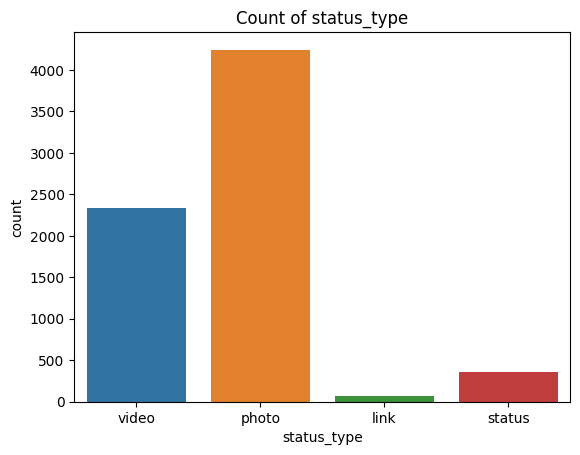

In [68]:
# fig,ax = plt.subplots()
sns.countplot(x=df['status_type'])
# ax.box_label(ax.containers[0])
plt.title('Count of status_type')
plt.show()

In [70]:
# d1 = df[df['status_type']!='photo']
# sns.countplot(x=d1['status_type'])
# plt.show()

In [71]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [72]:
a1 = df['status_type'].value_counts()
a1

photo     4244
video     2333
status     359
link        63
Name: status_type, dtype: int64

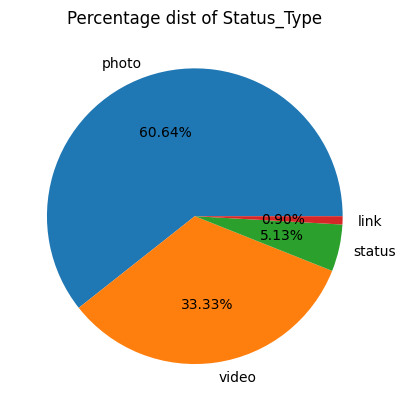

In [73]:
plt.pie(a1.values,labels=a1.index,autopct='%.2f%%')
plt.title('Percentage dist of Status_Type')
plt.show()

In [74]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


In [31]:
df.iloc[:,3:].describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


#### Boxplot fo different types of reactions

In [75]:
w = df.columns[3:]
print(w)
print(len(w))

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')
9


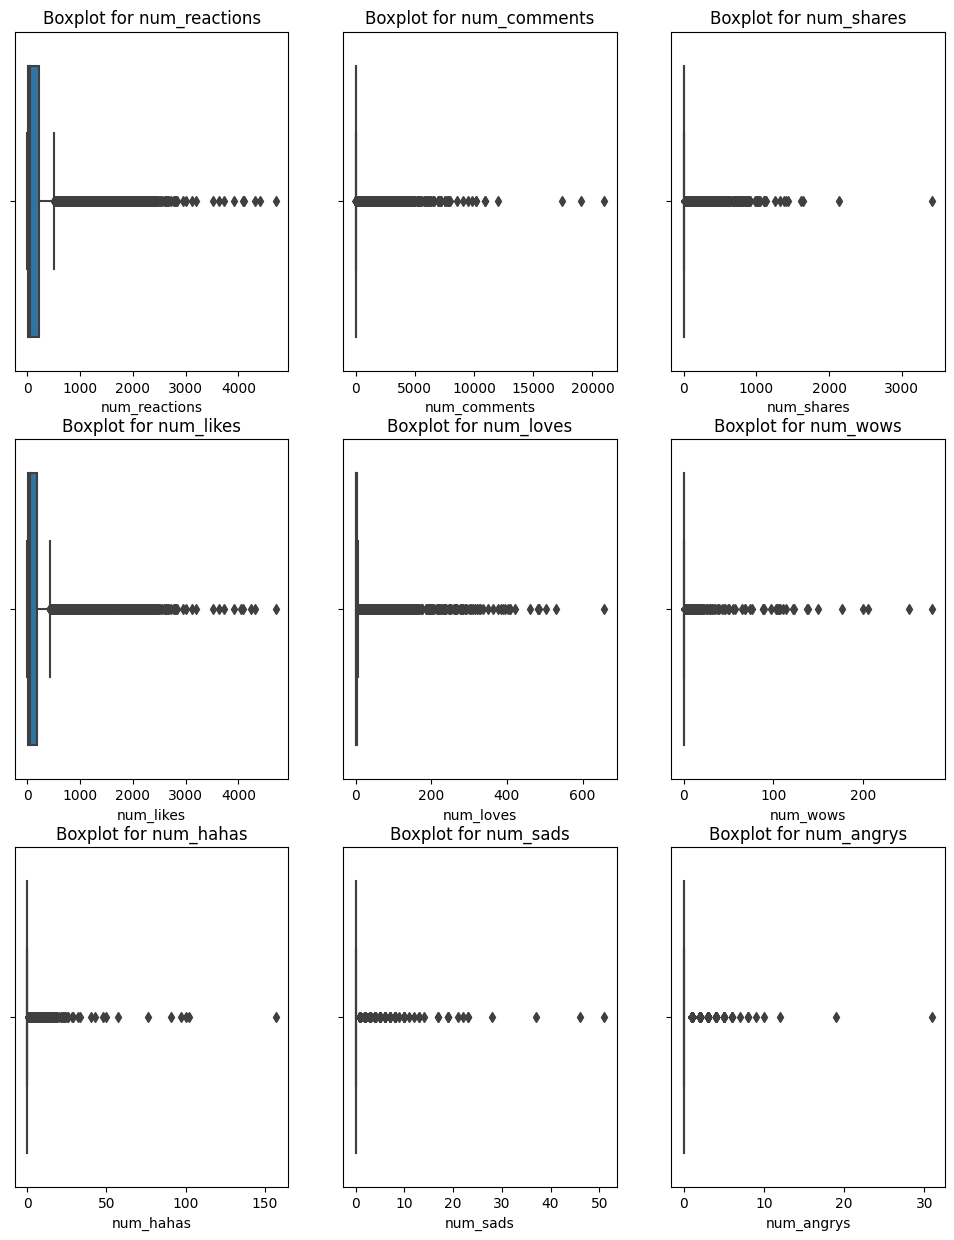

In [76]:
plt.figure(figsize=(12,15))
for i in range(len(w)):        # i = 0,1,2,3,4,5,6,7,8
    plt.subplot(3,3,i+1) 
    sns.boxplot(x = df[w[i]])
    plt.title(f'Boxplot for {w[i]}')
plt.show()

In [36]:
r = df[w].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T
r = r.iloc[:,3:]
r

,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
num_reactions,0.0,0.0,1.0,1.0,2.0,58.0,1220.3,1386.00,1712.12,2020.00,2293.08,4710.0
num_comments,0.0,0.0,0.0,0.0,0.0,4.0,1214.1,1484.08,1819.06,2638.12,4341.02,20990.0
num_shares,0.0,0.0,0.0,0.0,0.0,0.0,261.0,299.08,358.24,474.04,607.22,3424.0
num_likes,0.0,0.0,1.0,1.0,2.0,57.0,1133.3,1277.16,1562.24,1989.24,2288.06,4710.0
num_loves,0.0,0.0,0.0,0.0,0.0,0.0,77.0,90.00,105.06,135.00,198.04,657.0
num_wows,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.00,6.00,8.00,14.02,278.0
num_hahas,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.00,5.00,7.04,12.00,157.0
num_sads,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.00,2.00,3.00,4.00,51.0
num_angrys,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,2.00,3.00,31.0


In [77]:
print(df[df['num_reactions']>2293.08].shape)
print(df[df['num_comments']>4341.02].shape)
print(df[df['num_shares']>607.22].shape)
print(df[df['num_wows']>14.02].shape)

(70, 12)
(70, 12)
(70, 12)
(70, 12)


In [78]:
df1 = df.copy()
print(df.shape)  # removed 51 duplicates

(6999, 12)


In [79]:
for i in w:
    lower = df[i].quantile(0.01)
    upper =df[i].quantile(0.99)
    print(f'Feature {i}','Lower',lower,'Upper',upper)

Feature num_reactions Lower 0.0 Upper 2293.079999999998
Feature num_comments Lower 0.0 Upper 4341.019999999976
Feature num_shares Lower 0.0 Upper 607.2199999999948
Feature num_likes Lower 0.0 Upper 2288.0599999999986
Feature num_loves Lower 0.0 Upper 198.03999999999905
Feature num_wows Lower 0.0 Upper 14.019999999999527
Feature num_hahas Lower 0.0 Upper 12.0
Feature num_sads Lower 0.0 Upper 4.0
Feature num_angrys Lower 0.0 Upper 3.0


####  Outlier Clipping

In [82]:
for i in w:
    clip_val = df[i].quantile(0.99)
    df[i] = np.where(df[i]>clip_val,clip_val,df[i])

In [83]:
df.shape

(6999, 12)

In [84]:
r = df[w].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T
r = r.iloc[:,3:]
r

,min,1%,2%,3%,5%,50%,95%,96%,97%,98%,99%,max
num_reactions,0.0,0.0,1.0,1.0,2.0,58.0,1220.3,1386.00,1712.12,2020.00,2293.0016,2293.08
num_comments,0.0,0.0,0.0,0.0,0.0,4.0,1214.1,1484.08,1819.06,2638.12,4340.0204,4341.02
num_shares,0.0,0.0,0.0,0.0,0.0,0.0,261.0,299.08,358.24,474.04,607.0044,607.22
num_likes,0.0,0.0,1.0,1.0,2.0,57.0,1133.3,1277.16,1562.24,1989.24,2288.0012,2288.06
num_loves,0.0,0.0,0.0,0.0,0.0,0.0,77.0,90.00,105.06,135.00,198.0008,198.04
num_wows,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.00,6.00,8.00,14.0004,14.02
num_hahas,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.00,5.00,7.04,12.0000,12.00
num_sads,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.00,2.00,3.00,4.0000,4.00
num_angrys,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.00,2.00,3.0000,3.00


In [43]:
# for i in w:
#     lower = df[i].quantile(0.01)
#     upper = df[i].quantile(0.99)
#     df = df[(df[i]>lower) & (df[i]<upper)]

In [85]:
# r = df[w].describe(percentiles=[0.01,0.02,0.03,0.05,0.95,0.96,0.97,0.98,0.99]).T
# r = r.iloc[:,3:]
# r

In [86]:
df.shape

(6999, 12)

### Standardization

After Standardization<br>
1) Mean = 0, Std = 1.<br>
2) Data will be in similar range.

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()

In [87]:
data = df.iloc[:,3:]
data.columns
print(data.shape)
print(type(data))

(6999, 9)
<class 'pandas.core.frame.DataFrame'>


In [88]:
data_sc = sc.fit_transform(data)
print(data_sc.shape)
print(type(data_sc))

(6999, 9)
<class 'numpy.ndarray'>


### Problem_Statement - For Each Statius_id generate the cluster to which the fb_live_id belongs

#### 1) Determine the Optimal Number of Clusters - Elbow Method

In [89]:
from sklearn.cluster import KMeans

#### Elbow Methods
<pre>
x - Number of clusters
y - WCSS (Within Cluster sum of squares)
    It means => 
    Distance between each data point and its closest cluster center when summed up yields wcss
Elbow Shape => The bent of the elbow is the optimal number of clusters
</pre>

WCSS tends to reduce as the number of cluster increases

In [103]:
wcss = []
for i in range(1,17):  # i represents the number of clusters
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)   # wcss
    
print('WCSS',wcss)

WCSS [5431122332.896374, 3032801406.5524225, 1312978857.4141662, 866256596.1708567, 655651564.515391, 492521925.8445679, 372913998.5332586, 282408940.2440193, 234634428.8572728, 203841176.0525169, 178810793.60782626, 159548471.53486016, 143313411.0236259, 131271230.7745783, 121164365.69202375, 112705357.23190573]


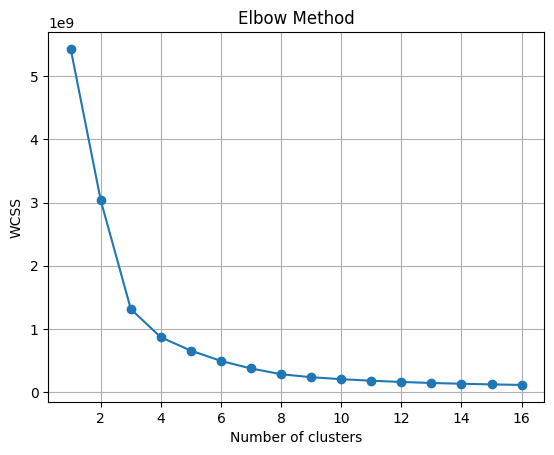

In [104]:
plt.plot(list(range(1,17)),wcss,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Inference
Optimal Number oc clusters = 4

#### Applying KMeans at K = 4

In [106]:
k4 = KMeans(n_clusters= 4)
k4.fit(data)

KMeans(n_clusters=4)

In [108]:
ypred_k4 = k4.predict(data)
print(ypred_k4)

[1 0 0 ... 0 0 0]


In [111]:
from collections import Counter
print(Counter(ypred_k4))

Counter({0: 6009, 1: 428, 2: 411, 3: 151})


In [112]:
df['Cluster4'] = ypred_k4
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster4
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0,1
1,246675545449582_1649426988507757,photo,2018-04-21 22:45:00,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0
2,246675545449582_1648730588577397,video,2018-04-21 06:17:00,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0,0
3,246675545449582_1648576705259452,photo,2018-04-21 02:29:00,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0
4,246675545449582_1645700502213739,photo,2018-04-18 03:22:00,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,0


In [113]:
res = df[['status_id','Cluster4']]
res

,status_id,Cluster4
0,246675545449582_1649696485147474,1
1,246675545449582_1649426988507757,0
2,246675545449582_1648730588577397,0
3,246675545449582_1648576705259452,0
4,246675545449582_1645700502213739,0
...,...,...
7045,1050855161656896_1061863470556065,0
7046,1050855161656896_1061334757275603,0
7047,1050855161656896_1060126464063099,0
7048,1050855161656896_1058663487542730,0


#### Standardization and Normlaiztaion

<pre>
After Standardization
1) Mean = 0, Std = 1
2) data is in similar range
3) We cant decide the range
4) Used when distance metric is involved or gradients are involved

After Normalization (deafult confiuration)
1) min = 0, max = 1
2) data is in similar range
3) we can decide the range
4) Used in ANN, PCA

</pre>

In [116]:
def fun(a,b):
    at  = list(a)  #   [2,4,6,8,10]
    for i,v in enumerate(a):  # i = 1,2,3,4,5, v = 2,4,6,8,10 
        if v in b:
            at.pop(i)
    return set(at)

a = {2,4,6,8,10}
b = {1,4,9}

In [117]:
res = fun(a,b)
print(res)

{8, 2, 10, 6}


In [120]:
def f(x):
    n = len(x)     # 4
    idc = (n//2,n//2) if n%2==1 else ((n//2)-1, (n//2))
    # idc = (2,2) if len(x)=odd, (2-1,2)=(1,2), if len(n) = even => idc = (1,2)
    return (x[idc[0]] + x[idc[1]])/ 2  # (x[1] + x[2])/2 = (8 + 16)/2 = 12
                
x = [4,8,16,32]
print(f(x))

12.0
